In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("store_data.csv",encoding='windows-1252')

In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


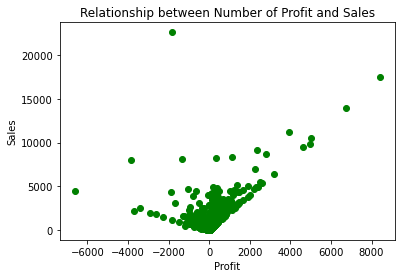

In [17]:
plt.scatter(df["Profit"], df["Sales"], color='green')
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Relationship between Number of Profit and Sales")
plt.show()

As we can see in the Relationship between profit and most of the observation clustered in range [-2000,+2000]. 

In [18]:
category = df['Category'].unique()

In [19]:
category

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
df_cate_sales = df.groupby(['Category'])['Sales'].sum()
df_cate_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

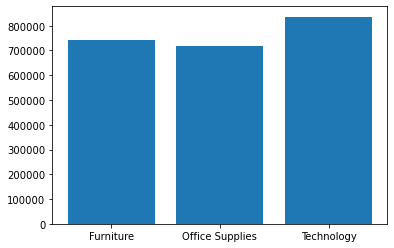

In [21]:
plt.bar(category,df_cate_sales)
plt.show()

If we check the total sales. We can see that Technology is make the most total sales. Furniture is a little bit more than office supplies.

In [22]:
df_cate_profit = df.groupby(['Category'])['Profit'].sum()

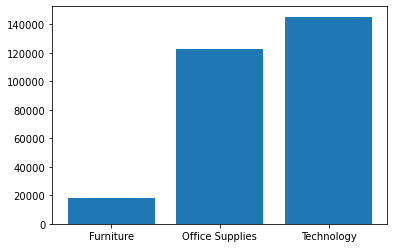

In [23]:
plt.bar(category,df_cate_profit)
plt.show()

However, once we change the sales to profit we can see that furniture category is have profit way lower than both office supplies and technology.

In [24]:
df_segment_profit = df.groupby(['Segment'])['Profit'].sum()

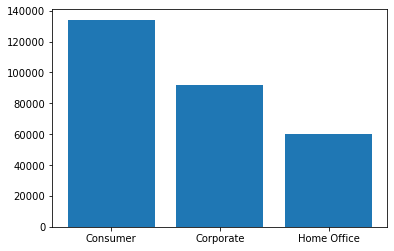

In [25]:
segment = df['Segment'].unique()
plt.bar(segment,df_segment_profit)
plt.show()

In this plot we can tell that cosumer purchase contribute to most of the profit.

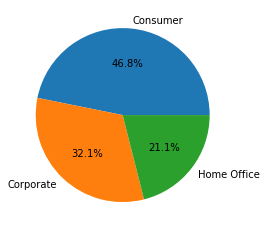

In [27]:
fig, ax = plt.subplots()
ax.pie(df_segment_profit, labels=segment, autopct='%1.1f%%')
plt.show()

If we use pie chart to visualize this data. We can see that Consumer contribute to 46.8% of total profit. Corporate 32.1% and Home Office 21.1%

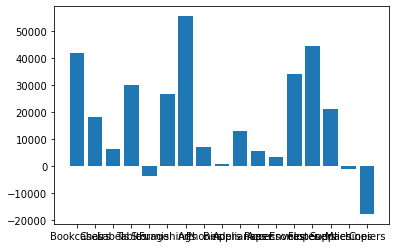

In [29]:
df_sub_cat_profit = df.groupby(['Sub-Category'])['Profit'].sum()
subcat = df['Sub-Category'].unique()
plt.bar(subcat,df_sub_cat_profit)
plt.show()

In [30]:
df_sub_cat_profit

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

If we check every sub-category we can tell there are three sub-categories have negative profit. Owner of the store should probably cut the sales of product in these subcat.
These sub-categories are Bookcases, Tables and Supplies. Also fastner is have very low profit. That is something owner should pay more attention to.